<a href="https://colab.research.google.com/github/michelucci/oreilly-london-ai/blob/master/day1/Image_classification_with_TFHub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image classification with TensorFlow Hub

Original (C) Google

Expanded and commented by Umberto Michelucci.

umberto.michelucci@toelt.ai

In [1]:
import matplotlib.pylab as plt

%tensorflow_version 2.x 
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.0.0-rc2


The first line is there in case where you run the code `tensorflow_hub` is not installed. The rest is just standard stuff.

In [0]:
!pip install -q -U tensorflow_hub
import tensorflow_hub as hub

from tensorflow.keras import layers

The following link points to the model that we want to use (mobilenet_v2). You can find more information on Tensorflow_Hub here

https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4

According to the documentation on Tensorflow_hub we have that
The output is a batch of logits vectors. The indices into the logits are the num_classes = 1001 classes of the classification from the original training (see above). The mapping from indices to class labels can be found in the file at `download.tensorflow.org/data/ImageNetLabels.txt`.

The input images are expected to have color values in the range [0,1], following the common image input conventions. For this module, the size of the input images is fixed to `height x width = 224 x 224` pixels.

In [0]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2"

In [0]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

Note that `IMAGE_SHAPE+(3,)` will give the following dimensions (simply adding the color channels at the end)

In [12]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

We then need to get a sample image. So we can get some from the `example_images` folder from the tensorflow.org website.

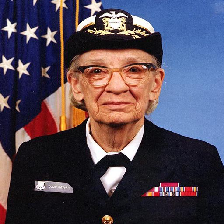

In [13]:
import numpy as np
import PIL.Image as Image

img = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
img = Image.open(img).resize(IMAGE_SHAPE)
img

In [14]:
img = np.array(img)/255.0
img.shape

(224, 224, 3)

now as usual with Keras, we can use `predict()` to get the percentage of each different class. Remember that the model we are using predict 1001 classes.

In [15]:
result = classifier.predict(img[np.newaxis, ...])
result.shape

(1, 1001)

In [16]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

653

Now we need to decode the class. That means we would like to have a human readable text to know what class 653 is. We need to download the list of labels from the tensorflow_hub again. Where it is, is typically documented on the TensorFlow Hub page for the model.

In [0]:
labels_path = tf.keras.utils.get_file('ImmageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

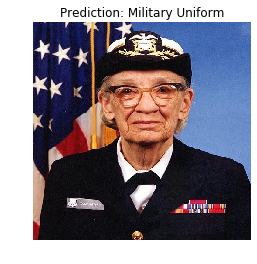

In [18]:
plt.imshow(img)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())